In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from scipy import linalg, stats
# my regression model
from LinRegression import LinearRegressor 

# Red Wine Quality Analysis

In [2]:
# Reading the dataset
# repository from UCI (https://archive.ics.uci.edu/ml/datasets/wine+quality)
data = pd.read_csv('winequality-red.csv', delimiter=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

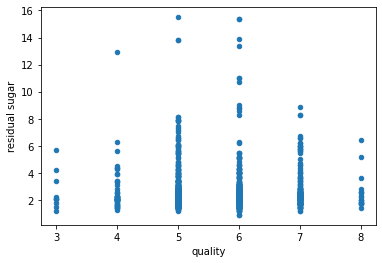

In [4]:
#for initial test
data.plot.scatter(x ='quality', y='residual sugar')

# Gathering testing data

In [5]:
data.shape

(1599, 12)

In [6]:
data['quality'].unique

<bound method Series.unique of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

In [7]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
data['quality'].count()

1599

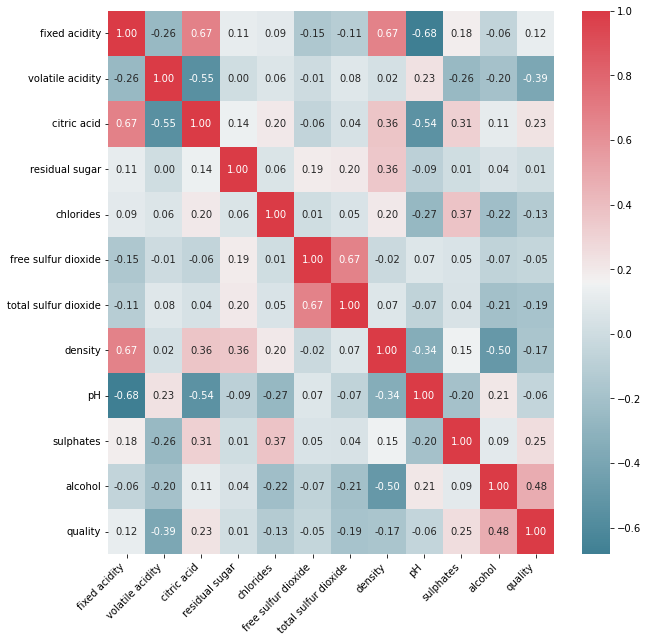

In [9]:
# To check correlation
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Correlation matrix
correlations = data.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
colormap = sb.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sb.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()
# Dark shades represents positive correlation while lighter shades represents negative correlation.
# If you set annot=True, you'll get values by which features are correlated to each other in grid-cells

# Initial Visual Analysis

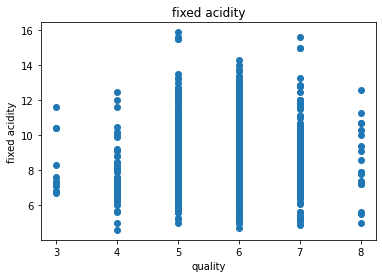

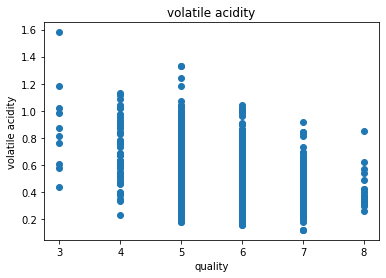

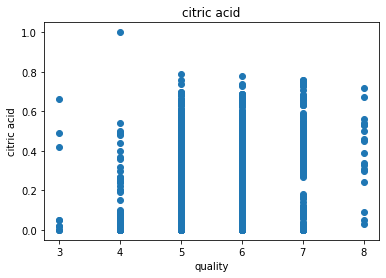

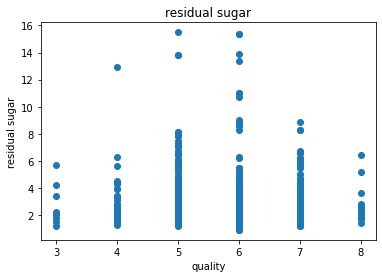

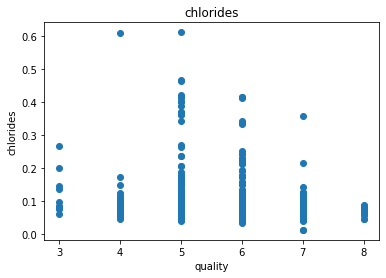

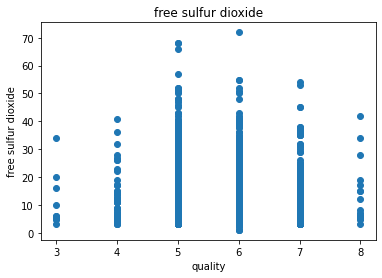

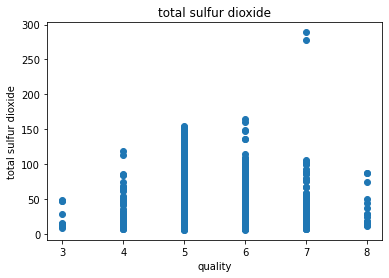

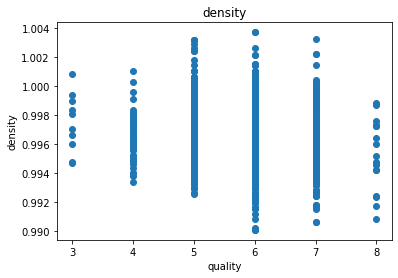

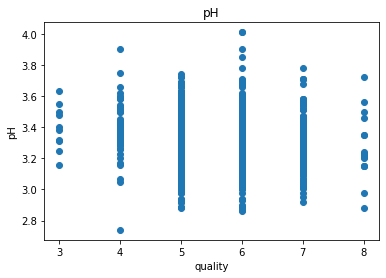

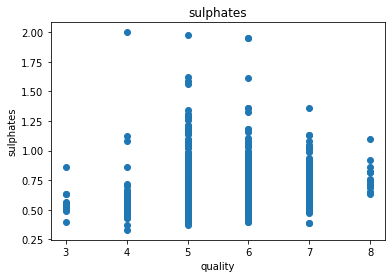

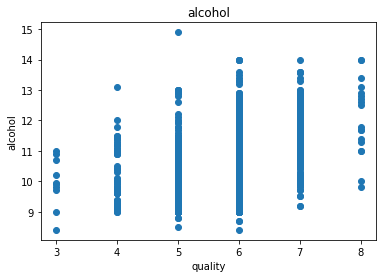

In [10]:
for label in data.columns[:-1]:
# for label in ['alcohol']:
    plt.scatter(data['quality'], data[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.show()

Through the visualization, the quality is between 3 and 9,
so I will categorize: 
3-5 as low quality(low),
6-7 as middle quality(mid),
8-9 as high quality(high)

In [11]:
bins = [0, 5.5, 7.5, 10]
labels = [0, 1, 2]
data['quality'] = pd.cut(data['quality'], bins=bins, labels=labels)

In [12]:
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# Split Data to Dependent and Independent Variables

In [13]:
# independent
X = np.array(data.drop('quality', axis=1))
print(X)

[[ 7.4    0.7    0.    ...  3.51   0.56   9.4  ]
 [ 7.8    0.88   0.    ...  3.2    0.68   9.8  ]
 [ 7.8    0.76   0.04  ...  3.26   0.65   9.8  ]
 ...
 [ 6.3    0.51   0.13  ...  3.42   0.75  11.   ]
 [ 5.9    0.645  0.12  ...  3.57   0.71  10.2  ]
 [ 6.     0.31   0.47  ...  3.39   0.66  11.   ]]


In [14]:
#dependent
Y = np.array(data.iloc[:,-1]).reshape((data.shape[0],1))
print(Y)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


In [15]:
model = LinearRegressor()

In [16]:
model.fit(X,Y)

In [17]:
model.coef_table.index = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free 4sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [18]:
model.coef_table[:-1]

,Coefficients,Standard Errors,t values,p values
fixed acidity,7.663025,14.193401,0.539901,5.893414e-01
volatile acidity,0.018661,0.017377,1.073915,2.830240e-01
citric acid,-0.548181,0.081098,-6.759485,1.939293e-11
residual sugar,-0.154798,0.098560,-1.570597,1.164757e-01
chlorides,0.008009,0.010046,0.797214,4.254459e-01
free 4sulfur dioxide,-0.922925,0.280782,-3.286981,1.034799e-03
total sulfur dioxide,0.004456,0.001454,3.064570,2.216560e-03
density,-0.003246,0.000488,-6.652516,3.954126e-11
pH,-8.497988,14.487069,-0.586591,5.575617e-01
sulphates,-0.133681,0.128307,-1.041878,2.976269e-01


In [19]:
model.predict(X)

array([[0.23914943],
       [0.2719275 ],
       [0.30597517],
       ...,
       [0.76963073],
       [0.51453478],
       [0.74057992]])

In [20]:
plt.show(X.all)